use IPython for writing, testing, and debugging,
show iPython: manipulate, process, clean and analyze structured datatypes: matrices, tabular/spreadsheet data, and relational databases
show top features of Pandas: http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/
show plotting and 2D visualization in MatPlotLib # http://matplotlib.org/examples/axes_grid/scatter_hist.html
show NumPy
use SciPy packages (numpy array) for scientific computing  http://www.scipy-lectures.org/index.html
connecting to Excel, sqlite, MySQL
Saving and loading text files (p. 104)
connecting to web api's and web data
sources of data

what is JSON?

Anaconda test drive: http://conda.pydata.org/docs/test-drive.html


First Steps with SQLAlchemy: http://bytefish.de/blog/first_steps_with_sqlalchemy/
http://www.sqlalchemy.org/

Scatter chart: http://matplotlib.org/examples/pylab_examples/scatter_demo2.html


Virtualenv: https://virtualenv.pypa.io/en/latest/userguide.html#usage
If using Anaconda then manage environments their way: http://conda.pydata.org/docs/using/envs.html

In [3]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sys
%matplotlib inline
names = ['Bob','Jessica','Mary','John','Mel']
births = [968,155,77,578,973]

BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [4]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [5]:
df.dtypes

Names     object
Births     int64
dtype: object

In [6]:
df.Births.dtype

dtype('int64')

In [7]:
#Summary Statistics
df.describe()

,Births
count,5.000000
mean,550.200000
std,428.424672
min,77.000000
25%,155.000000
50%,578.000000
75%,968.000000
max,973.000000


In [8]:
Sorted = df.sort(['Births'], ascending = False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [9]:
df['Births'].max()

973

The most popular name


,Names,Births
4,Mel,973


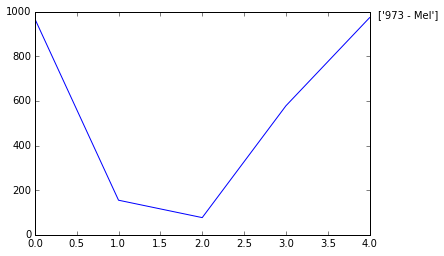

In [12]:
df['Births'].plot()
MaxValue = df['Births'].max()
MaxName = df['Names'][df['Births'] == df['Births'].max()].values
Text = str(MaxValue) + " - " + MaxName
plt.annotate(Text, xy=(1, MaxValue), xytext=(8,0),xycoords=('axes fraction', 'data'),textcoords='offset points')
print("The most popular name")
df[df['Births']==df['Births'].max()]


In [11]:
# http://stackoverflow.com/questions/30944577/check-if-string-is-in-a-pandas-dataframe/30946773#30946773
name = 'Jessica'
name_count=df['Names'].str.contains(name).sum()
if name_count>0:
    print ("There are {m} {n}".format(m=name_count,n=name))

There are 1 Jessica


In [13]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [14]:
#removing a row containing a value
'''
While the error message suggests that all() or any() can be used, 
they are useful only when you want to reduce the result into a single Boolean value. 
That is however not what you are trying to do now, which is to test the 
membership of every values in the Series against the external list, 
and keep the results intact (i.e., a Boolean Series which will then be used to slice the original DataFrame).

You can read more about this:
http://pandas.pydata.org/pandas-docs/stable/gotchas.html#using-if-truth-statements-with-pandas
'''
# http://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condtion?rq=1
a = ['Jessica']
df = df[~df['Names'].isin(a)]
df

,Names,Births
0,Bob,968
2,Mary,77
3,John,578
4,Mel,973


In [15]:
#counting matching rows
# http://stackoverflow.com/questions/29166314/how-to-count-conditions-across-a-row?rq=1
df[df>10].count()


Names     4
Births    4
dtype: int64

In [ ]:
# more on counting 
# http://stackoverflow.com/questions/29566603/python-pandas-conditional-count-across-columns?rq=1

In [16]:
# http://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas?rq=1
df = df[(df['Births'] >= 99) & (df['Births'] <= 970)]
df

,Names,Births
0,Bob,968
3,John,578


In [17]:
#Math on dataframe columns
# http://stackoverflow.com/questions/14059094/i-want-to-multiply-two-columns-in-a-pandas-dataframe-and-add-the-result-into-a-n
df = pd.DataFrame({'Quantity': [1,2,3], 'Cost': [2.00,3.50,4.00], 'Description':['dd','ee','ff'], 'Tax':[1.25,5.50,1.00]})
df['Total'] = df.sum(axis=1)
df

,Cost,Description,Quantity,Tax,Total
0,2.0,dd,1,1.25,4.25
1,3.5,ee,2,5.50,11.00
2,4.0,ff,3,1.00,8.00


In [18]:
#reading Excel files (p. 172 python for d.a.)
# http://stackoverflow.com/questions/16888888/how-to-read-a-xlsx-file-using-the-pandas-library-in-ipython
xl_file = pd.ExcelFile(file_name)

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

NameError: name 'file_name' is not defined

In [ ]:
# example from https://michigancomputes.wordpress.com/2013/05/10/data-analysis-the-ipython-notebook-way-in-a-single-day/
#open the Excel workbook
workbook = openpyxl.load_workbook(filename = f, use_iterators=True)

#select the worksheet in the workbook
worksheet = workbook.get_sheet_by_name(name = 'Sheet1')

#initialize an empty list to 
table = []
#iterate through the rows in the worksheet
for row in worksheet.iter_rows():
#iterate through the columns
for column in row:
#append the value to the list
table.append(column.internal_value)

In [ ]:
# http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/

In [ ]:
# http://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condtion?rq=1
# http://stackoverflow.com/questions/29166314/how-to-count-conditions-across-a-row?rq=1
# http://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas?rq=1
# http://stackoverflow.com/questions/14124710/two-columns-of-a-pandas-dataframe-concat-in-python?rq=1
# http://stackoverflow.com/questions/14059094/i-want-to-multiply-two-columns-in-a-pandas-dataframe-and-add-the-result-into-a-n
# http://pandas.pydata.org/pandas-docs/stable/gotchas.html#using-if-truth-statements-with-pandas



In [ ]:
# Notebook Galleries
# https://www.eecis.udel.edu/~boncelet/ipython.html
# https://www.eecis.udel.edu/~boncelet/IntroScientificComputingPython.html
# https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks
# https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#whimsical-notebooks


In [ ]:
# Final Project
# # http://nbviewer.ipython.org/github/Jay-Oh-eN/happy-healthy-hungry/blob/master/h3.ipynb


In [ ]:
# http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/#stats


In [ ]:
help(np.random)

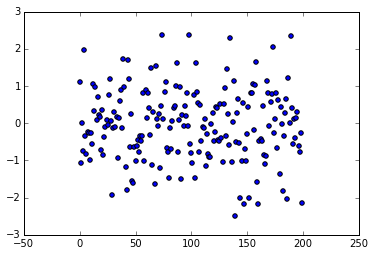

In [24]:
#scatter plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.DataFrame({'Col': np.random.normal(size=200)})
plt.scatter(dataframe.index, dataframe['Col'])

In [25]:
#timeseries plot... .needs df with a time series
# http://markthegraph.blogspot.com/2015/05/plotting-time-series-dataframes-in.html
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
plt.style.use('ggplot')

def plot(df, filename, heading=None):

    fig, ax = plt.subplots(figsize=(8, 4))

    min_date = None
    max_date = None
    for col_name in df.columns.values:

        # plot the column
        col = df[col_name]
        col = col[col.notnull()] # drop NAs
        dates = [zzz.to_timestamp().date() for zzz in col.index]
        ax.plot_date(x=dates, y=col, fmt='-', label=col_name,
            tz=None, xdate=True, ydate=False, linewidth=1.5)

        # establish the date range for the data
        if min_date:
            min_date = min(min_date, min(dates))
        else:
            min_date = min(dates)
        if max_date:
            max_date = max(max_date, max(dates))
        else:
            max_date = max(dates)

    # give a bit of space at each end of the plot - aesthetics
    span = max_date - min_date
    extra = int(span.days * 0.03) * datetime.timedelta(days=1)
    ax.set_xlim([min_date - extra, max_date + extra])

    # format the x tick marks
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(DateFormatter('\n%b'))
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator(bymonthday=1, interval=2))

    # grid, legend and yLabel
    ax.grid(True)
    ax.legend(loc='best', prop={'size':'x-small'})
    ax.set_ylabel('Percent')

    # heading
    if heading:
        fig.suptitle(heading, fontsize=12)
    fig.tight_layout(pad=1.5)

    # footnote
    fig.text(0.99, 0.01, 'marktheballot.blogspot.com.au', ha='right', 
        va='bottom', fontsize=8, color='#999999')

    # save to file
    fig.savefig(filename, dpi=125)

AttributeError: 'numpy.int64' object has no attribute 'to_timestamp'

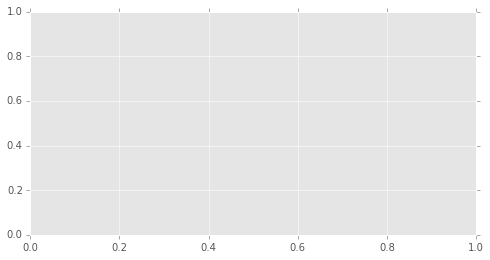

In [26]:
plot(df,'c:\test.txt')

In [28]:
# http://stackoverflow.com/questions/16947336/binning-a-dataframe-in-pandas-in-python
'''
given a df where id is an id for each point consisting of an a and b value, 
how can I bin a and b into a specified set of bins 
(so that I can then take the median/average value of a and b in each bin)?  
df might have NaN values for a or b (or both) for any given row in df.
'''
import numpy as np
import pandas

df = pandas.DataFrame({"a": np.random.random(100),
                       "b": np.random.random(100),
                       "id": np.arange(100)})

# Bin the data frame by "a" with 10 bins...
bins = np.linspace(df.a.min(), df.a.max(), 10)
groups = df.groupby(np.digitize(df.a, bins))

# Get the mean of each bin:
print (groups.mean()) # Also could do "groups.aggregate(np.mean)"

# Similarly, the median:
print (groups.median())

# Apply some arbitrary function to aggregate binned data
print (groups.aggregate(lambda x: np.mean(x[x > 0.5])))

           a         b         id
1   0.033363  0.417198  60.400000
2   0.171638  0.495794  45.272727
3   0.265727  0.716758  46.600000
4   0.401239  0.489243  38.625000
5   0.507286  0.481878  46.444444
6   0.601027  0.435642  43.714286
7   0.707246  0.588129  61.133333
8   0.807911  0.455398  45.000000
9   0.938664  0.455485  59.142857
10  0.988057  0.327353  29.000000
           a         b    id
1   0.032711  0.318927  64.0
2   0.168458  0.495303  39.0
3   0.263632  0.735488  60.0
4   0.404831  0.548690  37.5
5   0.511420  0.488555  49.0
6   0.615569  0.371914  34.0
7   0.717316  0.652552  57.0
8   0.808336  0.529243  39.0
9   0.945145  0.479817  59.0
10  0.988057  0.327353  29.0
           a         b         id
1        NaN  0.759341  60.400000
2        NaN  0.754259  45.272727
3        NaN  0.787800  46.600000
4        NaN  0.728892  44.142857
5   0.516913  0.806901  46.444444
6   0.601027  0.721583  43.714286
7   0.707246  0.757952  61.133333
8   0.807911  0.769861  45.000000
9

In [34]:
import random
babynames = open("babynames.csv","w")
print(random.randint(1000,9000))
for i in range(1,1000):
    babynames.write("Name #{0},{1}\r".format(i,random.randint(1000,10000)))
babynames.close()


    

7995


In [ ]:
# http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/